# Vehicle Recognizer

The goal of this project is to classify 28 different types of vehicle commonly around the world.
The types are following:

1. Van
2. Taxi
3. Police car
4. Bus
5. Ambulance
6. Skateboard
7. Baby carriage
8. Bicycle
9. Mountain bike
10. Scooter
11. Motorcycle
12. Fire engine
13. Crane
14. Forklift
15. Tractor
16. Recycling truck
17. Cement mixer
18. Dump truck
19. Subway
20. Aerial tramway
21. Helicopter
22. Airplane
23. Balloon
24. Tram
25. Carriage
26. Rowboat
27. Boat
28. Train

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 1

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Vehicle Recognizer

/content/drive/My Drive/Vehicle Recognizer


# Fetch Data

In [ ]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image o

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"Vehicle_dataloader_v{version}.pkl")

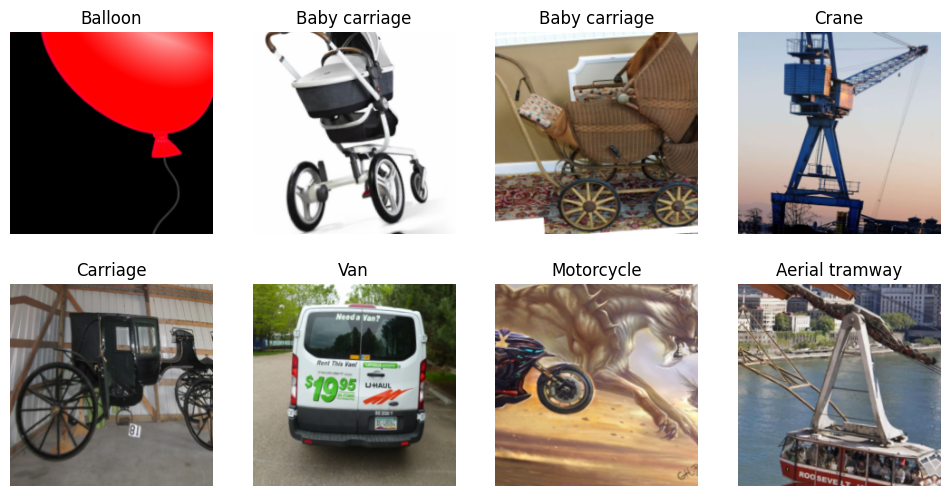

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

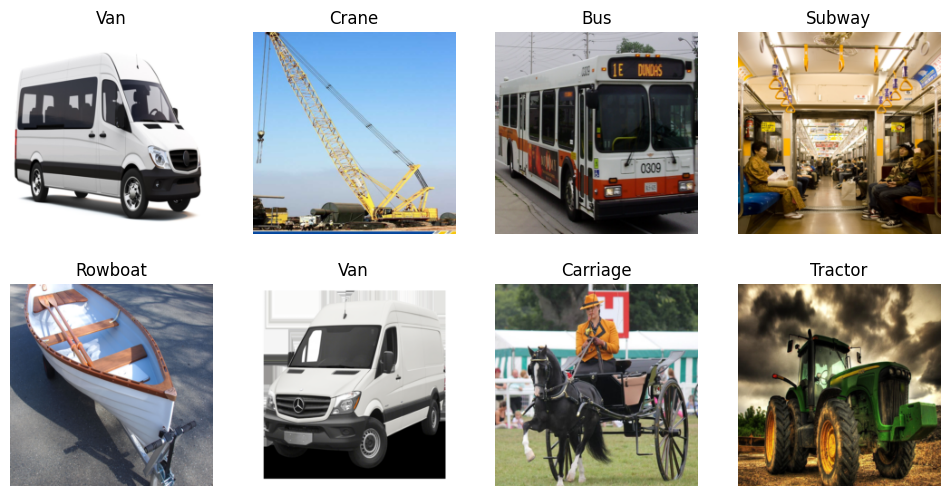

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training and Data Cleaning

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [ ]:
model.load(f"Vehicle-recognizer-v{version-1}")

In [ ]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.268420,0.133421,0.044625,0.955375,03:41


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.359154,0.124061,0.028398,0.971602,03:43


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.save(f"Vehicle-recognizer-v{version}")

Path('models/Vehicle-recognizer-v1.pth')

In [ ]:
# cleaner = ImageClassifierCleaner(model)
# cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [ ]:
model.export(f"{model_path}/Vehicle-recognizer-v{version}.pkl")